<a href="https://colab.research.google.com/github/Switch-bot/TFPA-II/blob/main/Template_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import timeit #more accurate than time
import seaborn as sns
sns.set_style("white")
import os
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Uploading files to Google Colabs
#Here we are importing .csv files to pandas DataFrames
#.csv files have 1 entry per line, with the different variables separated by
#commas. The first line always has the variable's name.
!wget https://media.githubusercontent.com/media/Switch-bot/TFPA-II/main/Data/kinematic_variables_HNLtoPimu.dat
!wget https://media.githubusercontent.com/media/Switch-bot/TFPA-II/main/Data/kinematic_variables_Back.dat

--2025-03-07 10:14:40--  https://media.githubusercontent.com/media/Switch-bot/TFPA-II/main/Data/kinematic_variables_HNLtoPimu.dat
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1097225 (1.0M) [text/plain]
Saving to: ‘kinematic_variables_HNLtoPimu.dat’

kinematic_variables 100%[===================>]   1.05M  --.-KB/s    in 0.009s  

2025-03-07 10:14:41 (122 MB/s) - ‘kinematic_variables_HNLtoPimu.dat’ saved [1097225/1097225]

--2025-03-07 10:14:41--  https://media.githubusercontent.com/media/Switch-bot/TFPA-II/main/Data/kinematic_variables_Back.dat
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.

In [3]:
Signal = pandas.read_csv("kinematic_variables_HNLtoPimu.dat")
Background = pandas.read_csv("kinematic_variables_Back.dat")

In [4]:
Signal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type
0,22.543477,0.443479,0.019672,0.059032,2.227704,13.576655,0.344095,0.025345,8.976036,0.411043,0.045793,-537.318654,131.825641,21.826524,0.110174,0.696352,1,1
1,51.322938,0.326516,0.006362,0.030646,0.336051,9.440679,0.292793,0.031014,41.881081,0.098565,0.002353,18.989337,-20.872495,-41.286370,0.582356,0.700938,1,1
2,16.900178,0.649157,0.038411,0.083947,0.476238,11.622630,0.561400,0.048302,5.290929,0.352042,0.066537,1175.279806,-51.072361,-318.745356,0.301605,0.705130,1,1
3,18.552950,0.404092,0.021780,0.095877,1.406675,15.802481,0.537997,0.034045,2.761307,0.182540,0.066106,648.938179,-134.942865,106.998042,0.077084,0.706107,1,1
4,48.884258,0.894020,0.018289,0.027627,0.430222,17.658208,0.326829,0.018509,31.199331,0.767414,0.024597,580.612488,-27.630552,-140.576810,0.458085,0.698474,1,1


In [ ]:
Signal

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type
0,22.543477,0.443479,0.019672,0.059032,2.227704,13.576655,0.344095,0.025345,8.976036,0.411043,0.045793,-537.318654,131.825641,21.826524,0.110174,0.696352,1,1
1,51.322938,0.326516,0.006362,0.030646,0.336051,9.440679,0.292793,0.031014,41.881081,0.098565,0.002353,18.989337,-20.872495,-41.286370,0.582356,0.700938,1,1
2,16.900178,0.649157,0.038411,0.083947,0.476238,11.622630,0.561400,0.048302,5.290929,0.352042,0.066537,1175.279806,-51.072361,-318.745356,0.301605,0.705130,1,1
3,18.552950,0.404092,0.021780,0.095877,1.406675,15.802481,0.537997,0.034045,2.761307,0.182540,0.066106,648.938179,-134.942865,106.998042,0.077084,0.706107,1,1
4,48.884258,0.894020,0.018289,0.027627,0.430222,17.658208,0.326829,0.018509,31.199331,0.767414,0.024597,580.612488,-27.630552,-140.576810,0.458085,0.698474,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,79.321386,1.170512,0.014757,0.035059,0.790193,40.753549,1.244236,0.030531,38.577508,0.375277,0.009728,605.183261,-30.226411,110.811681,0.683282,1.409074,1,1
4253,20.374568,0.120477,0.005913,0.139750,8.282339,12.640320,0.598087,0.047316,7.775607,0.717693,0.092301,1891.796904,45.819260,-1.082361,0.096203,1.405847,1,1
4254,56.282508,0.567485,0.010083,0.051078,0.801557,36.066201,0.313037,0.008679,20.290246,0.864470,0.042605,-1071.981363,-49.597133,38.552096,0.348169,1.404706,1,1
4255,63.569448,1.089439,0.017138,0.051722,1.246836,49.565213,0.756283,0.015258,14.018896,0.713730,0.050912,1351.967862,119.482250,85.929070,0.010497,1.390710,1,1


In [ ]:
#Printing a single collumn
print(Signal[" Mother Transverse Momentum (GeV/c)"])

0       0.443479
1       0.326516
2       0.649157
3       0.404092
4       0.894020
          ...   
4252    1.170512
4253    0.120477
4254    0.567485
4255    1.089439
4256    0.223584
Name:  Mother Transverse Momentum (GeV/c), Length: 4257, dtype: float64


In [ ]:
variable = "Mother Total Momentum (GeV/c)"
for entry, value in enumerate(Signal[variable]):
  print("Entry number " + str(entry))
  print(variable + ": " + str(value))
  if entry > 4.5-1: break

Entry number 0
Mother Total Momentum (GeV/c): 22.5434772028
Entry number 1
Mother Total Momentum (GeV/c): 51.322938076
Entry number 2
Mother Total Momentum (GeV/c): 16.9001782719
Entry number 3
Mother Total Momentum (GeV/c): 18.5529498755
Entry number 4
Mother Total Momentum (GeV/c): 48.8842584634


In [ ]:
FullSignal = pandas.concat([Signal, Background], ignore_index=True)
print("Lenght of the Signal: " + str(len(Signal)))
print("Lenght of the Background: " + str(len(Background)))
print("Lenght of the concatenated dataset: " + str(len(FullSignal)))
#FullSignal.head()
FullSignal.tail()

Lenght of the Signal: 4257
Lenght of the Background: 3639
Lenght of the concatenated dataset: 7896


,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type
7891,6.801441,0.242971,0.035723,0.003694,199.667017,1.382475,0.045812,0.033138,5.418165,0.196412,0.036251,700.670489,57.688520,68.826882,3.241300,0.331550,-1,4
7892,12.034546,0.595302,0.049466,0.036048,201.717555,9.386960,0.460034,0.049008,2.641962,0.157516,0.059621,-2333.437344,-65.571576,150.615987,7.743315,0.327161,-1,4
7893,22.350196,0.918840,0.041111,0.015536,254.339205,16.828812,0.690480,0.041030,5.406403,0.242659,0.044884,-1557.463523,18.344480,21.590345,12.141207,0.287947,-1,4
7894,4.723379,0.059261,0.012546,0.050684,255.495322,3.956148,0.065179,0.016475,0.761470,0.036173,0.047504,901.186610,-66.701987,-172.015640,100.339121,0.314454,-1,4
7895,24.243817,1.231107,0.050780,0.031114,237.217839,7.887031,0.405342,0.051394,16.325394,0.875441,0.053624,-2367.105213,7.699417,-13.184061,3.638077,0.459234,-1,4


In [ ]:
#Creating new columns with relevant information is as simple as "accessing" a
#previously non-existent column like "Decay" and setting its value
Signal['Decay'] = 1
Signal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Decay
0,22.543477,0.443479,0.019672,0.059032,2.227704,13.576655,0.344095,0.025345,8.976036,0.411043,0.045793,-537.318654,131.825641,21.826524,0.110174,0.696352,1,1,1
1,51.322938,0.326516,0.006362,0.030646,0.336051,9.440679,0.292793,0.031014,41.881081,0.098565,0.002353,18.989337,-20.872495,-41.286370,0.582356,0.700938,1,1,1
2,16.900178,0.649157,0.038411,0.083947,0.476238,11.622630,0.561400,0.048302,5.290929,0.352042,0.066537,1175.279806,-51.072361,-318.745356,0.301605,0.705130,1,1,1
3,18.552950,0.404092,0.021780,0.095877,1.406675,15.802481,0.537997,0.034045,2.761307,0.182540,0.066106,648.938179,-134.942865,106.998042,0.077084,0.706107,1,1,1
4,48.884258,0.894020,0.018289,0.027627,0.430222,17.658208,0.326829,0.018509,31.199331,0.767414,0.024597,580.612488,-27.630552,-140.576810,0.458085,0.698474,1,1,1


In [ ]:
#If for some reason we wish to remove a column, we can use the
#DataFrame::drop("column", inplace = True, axis = 1) method, where inplace=True
#specifies that we want to alter the object itself, instead of creating a copy
#with the alterations, and axis=0 or 1 refers to line or column respectively
Signal.drop("Decay", inplace = True, axis = 1)
Signal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type
0,22.543477,0.443479,0.019672,0.059032,2.227704,13.576655,0.344095,0.025345,8.976036,0.411043,0.045793,-537.318654,131.825641,21.826524,0.110174,0.696352,1,1
1,51.322938,0.326516,0.006362,0.030646,0.336051,9.440679,0.292793,0.031014,41.881081,0.098565,0.002353,18.989337,-20.872495,-41.286370,0.582356,0.700938,1,1
2,16.900178,0.649157,0.038411,0.083947,0.476238,11.622630,0.561400,0.048302,5.290929,0.352042,0.066537,1175.279806,-51.072361,-318.745356,0.301605,0.705130,1,1
3,18.552950,0.404092,0.021780,0.095877,1.406675,15.802481,0.537997,0.034045,2.761307,0.182540,0.066106,648.938179,-134.942865,106.998042,0.077084,0.706107,1,1
4,48.884258,0.894020,0.018289,0.027627,0.430222,17.658208,0.326829,0.018509,31.199331,0.767414,0.024597,580.612488,-27.630552,-140.576810,0.458085,0.698474,1,1


In [ ]:
Signal["Decay Type"] = 1
Signal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Decay Type
0,22.543477,0.443479,0.019672,0.059032,2.227704,13.576655,0.344095,0.025345,8.976036,0.411043,0.045793,-537.318654,131.825641,21.826524,0.110174,0.696352,1,1,1
1,51.322938,0.326516,0.006362,0.030646,0.336051,9.440679,0.292793,0.031014,41.881081,0.098565,0.002353,18.989337,-20.872495,-41.286370,0.582356,0.700938,1,1,1
2,16.900178,0.649157,0.038411,0.083947,0.476238,11.622630,0.561400,0.048302,5.290929,0.352042,0.066537,1175.279806,-51.072361,-318.745356,0.301605,0.705130,1,1,1
3,18.552950,0.404092,0.021780,0.095877,1.406675,15.802481,0.537997,0.034045,2.761307,0.182540,0.066106,648.938179,-134.942865,106.998042,0.077084,0.706107,1,1,1
4,48.884258,0.894020,0.018289,0.027627,0.430222,17.658208,0.326829,0.018509,31.199331,0.767414,0.024597,580.612488,-27.630552,-140.576810,0.458085,0.698474,1,1,1


In [ ]:
#Pandas allows us to perform bulk cuts on DataFrames in a somewhat easy fashion
SmallIP = Signal[Signal[" Impact Parameter (cm)"] <= 2]
print(len(Signal))
SmallIP.head()

4257


,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Decay Type
1,51.322938,0.326516,0.006362,0.030646,0.336051,9.440679,0.292793,0.031014,41.881081,0.098565,0.002353,18.989337,-20.872495,-41.286370,0.582356,0.700938,1,1,1
2,16.900178,0.649157,0.038411,0.083947,0.476238,11.622630,0.561400,0.048302,5.290929,0.352042,0.066537,1175.279806,-51.072361,-318.745356,0.301605,0.705130,1,1,1
3,18.552950,0.404092,0.021780,0.095877,1.406675,15.802481,0.537997,0.034045,2.761307,0.182540,0.066106,648.938179,-134.942865,106.998042,0.077084,0.706107,1,1,1
4,48.884258,0.894020,0.018289,0.027627,0.430222,17.658208,0.326829,0.018509,31.199331,0.767414,0.024597,580.612488,-27.630552,-140.576810,0.458085,0.698474,1,1,1
5,42.392836,0.513977,0.012124,0.038999,0.439772,6.618308,0.137917,0.020839,35.790849,0.651425,0.018201,5.261298,83.733369,-26.042468,0.233873,0.706153,1,1,1


In [ ]:
#We can also perform more complex cuts using AND and OR operators
#This may not be enough to perform every cut that we might want but is still helpful
NewSignal = Signal[(Signal[" Impact Parameter (cm)"] < 2.) & (Signal[" Decay Z (cm)"] > -2000.)]
NewSignal.head()

,Mother Total Momentum (GeV/c),Mother Transverse Momentum (GeV/c),Mother Fraction of Transverse Momentum,Opening Angle (rad),Impact Parameter (cm),Daughter1 Total Momentum (GeV/c),Daughter1 Transverse Momentum (GeV/c),Daughter1 Fraction of Transverse Momentum,Daughter2 Total Momentum (GeV/c),Daughter2 Transverse Momentum (GeV/c),Daughter2 Fraction of Transverse Momentum,Decay Z (cm),Decay X (cm),Decay Y (cm),DOCA (cm),Invariant Mass (GeV/c^2),Good Reco,Event Type,Decay Type
1,51.322938,0.326516,0.006362,0.030646,0.336051,9.440679,0.292793,0.031014,41.881081,0.098565,0.002353,18.989337,-20.872495,-41.286370,0.582356,0.700938,1,1,1
2,16.900178,0.649157,0.038411,0.083947,0.476238,11.622630,0.561400,0.048302,5.290929,0.352042,0.066537,1175.279806,-51.072361,-318.745356,0.301605,0.705130,1,1,1
3,18.552950,0.404092,0.021780,0.095877,1.406675,15.802481,0.537997,0.034045,2.761307,0.182540,0.066106,648.938179,-134.942865,106.998042,0.077084,0.706107,1,1,1
4,48.884258,0.894020,0.018289,0.027627,0.430222,17.658208,0.326829,0.018509,31.199331,0.767414,0.024597,580.612488,-27.630552,-140.576810,0.458085,0.698474,1,1,1
5,42.392836,0.513977,0.012124,0.038999,0.439772,6.618308,0.137917,0.020839,35.790849,0.651425,0.018201,5.261298,83.733369,-26.042468,0.233873,0.706153,1,1,1


Text(0, 0.5, ' Impact Parameter (cm)')

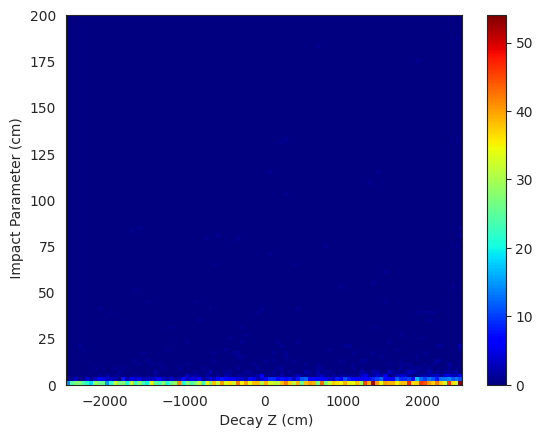

In [ ]:
#In this case we will be plotting a 2D histogram with the number of events as a
#function of both the Decay Position of our HNL along the Decay Vessel and the
#Impact Parameter

#We start by defining the variables that we want to plot for ease of copy of
#this code to other variables
Labels = [' Decay Z (cm)', ' Impact Parameter (cm)']

#In order to plot something with matplotlib we need to define a figure and
#create arrays with data to use as inputs
plt.figure(1)
datax = []
for x in Signal[Labels[0]]:
    datax.append(x)

datay = []
for y in Signal[Labels[1]]:
    datay.append(y)

#Here we create our histograms by defining the data for the x axis, y axis, the
#number of bins, the style of the histogram and the range of our axes
#Notice that defining the binning as a single value makes it so both axes have
#the same number of bins
plt.hist2d(datax, datay, bins=100, cmap=plt.cm.jet, range = [[-2500,2500],[0,200]])
plt.colorbar()
plt.xlabel(Labels[0])
plt.ylabel(Labels[1])

#We can save our plot by using matplotlib::savefig("path")
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/TFPAII/Background.jpg')

<ipython-input-16-52db29b59e1b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist_kws={"range": [0,250]}, norm_hist = True, kde=False, label = "Heavy Neutral Leptons")#, fit=stats.gamma);
<ipython-input-16-52db29b59e1b>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist_

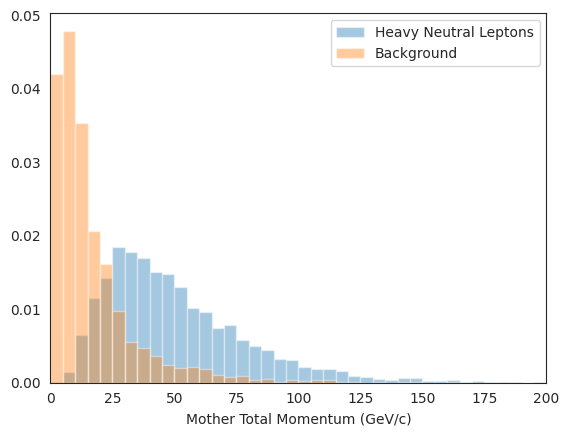

In [ ]:
#Overlapping distributions can be done with Seaborn
#This is simple to do since seaborn takes full pandas::dataframe columns as
#input, and automatically overlaps distributions just by adding two different
#datasets to the same object, as seen below

FullData = pandas.concat([Signal, Background], ignore_index=True)

x = Signal["Mother Total Momentum (GeV/c)"]
y = Background["Mother Total Momentum (GeV/c)"]

ax = sns.distplot(x, hist_kws={"range": [0,250]}, norm_hist = True, kde=False, label = "Heavy Neutral Leptons")#, fit=stats.gamma);
ax = sns.distplot(y, hist_kws={"range": [0,250]}, norm_hist = True, kde=False, label = "Background")#, fit=stats.gamma);
ax.set_xlim(0, 200)
plt.legend()

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/TFPAII/TotalMomentumComparison.jpg')

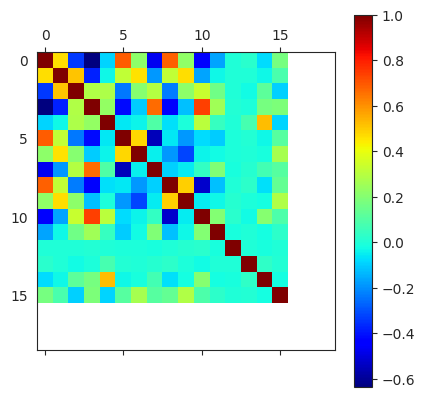

In [ ]:
#Simple way of plotting the correlation matrix with pandas
Signal.corr()
fig = plt.matshow(Signal.corr(), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [ ]:
#Using SKLearn pipelines in order to normalize all data to an average value of 0
#with a standard deviation of 1
#This block creates a pipeline that defines this specific normalizer

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

normIn = True #True #Whether we want to normalise and standardise the inputs
pca = False #True #Whether we want to use principal-component analysis to decorrelate inputs
whiten = False #True #Whether we want to whiten input data

stepsIn = []
if not normIn and not pca:
    stepsIn.append(('ident', StandardScaler(with_mean=False, with_std=False))) #For compatability
else:
    if normIn:
        stepsIn.append(('normIn', StandardScaler()))
    if pca:
        stepsIn.append(('pca', PCA(whiten=whiten)))
inputPipe = Pipeline(stepsIn)
stepsOut = []
print(stepsIn)

[('normIn', StandardScaler())]


In [ ]:
#Let us define the variables that we want to normalize
#The columns in the file are separated by ", " so since this reads it as a .csv
#file the spaces count in the names.
Features = [var for var in Signal.columns if str.startswith(var, " Event") or str.startswith(var, " Decay Angle") or str.startswith(var, "target") or str.startswith(var, " Decay Mode") or str.startswith(var, " Decay X") or str.startswith(var, " Decay Y") or str.startswith(var,'signal_probability') or str.startswith(var, " Daughter1 Fraction") or str.startswith(var, " Daughter2 Fraction") or str.startswith(var, " Mother Transverse") or str.startswith(var, " Invariant Mass (GeV/c^2)") or str.startswith(var, " Good Reco") or str.startswith(var, "Decay Type")]
NotFeatures = []
for var in Signal.columns:
  if var not in Features: NotFeatures.append(var)

print(Features)
print(NotFeatures)

[' Mother Transverse Momentum (GeV/c)', ' Daughter1 Fraction of Transverse Momentum', ' Daughter2 Fraction of Transverse Momentum', ' Decay X (cm)', ' Decay Y (cm)', ' Invariant Mass (GeV/c^2)', ' Good Reco', ' Event Type']
['Mother Total Momentum (GeV/c)', ' Mother Fraction of Transverse Momentum', ' Opening Angle (rad)', ' Impact Parameter (cm)', ' Daughter1 Total Momentum (GeV/c)', ' Daughter1 Transverse Momentum (GeV/c)', ' Daughter2 Total Momentum (GeV/c)', ' Daughter2 Transverse Momentum (GeV/c)', ' Decay Z (cm)', ' DOCA (cm)']


In [ ]:
#Here we feed the normalizer the data.
#Be carefull because the normalization is dependent on the events fed to it
#So you should always normalize the full dataset first, and then divide it

SelectedSignal = Signal.drop(columns=Features, inplace = False)
X_class_train = inputPipe.fit_transform(SelectedSignal.values.astype('float32')) #This is a numpy array

#We can transform it into a pandas dataframe for confort
normalizedFeatures = []
for var in Signal.columns:
    if var not in Features:
        normalizedFeatures.append(var[:var.find("(")])
for i, var in enumerate(normalizedFeatures):
    if str.startswith(var, ' Mother Fraction'):
        normalizedFeatures[i] = normalizedFeatures[i] + "m"

#Be carefull because due to our PCA these labels do not correspond necessarily
#to the features that we have, and are just placeholders.
#The values actually correspond to projections of our original dataset into a
#space where the each component is as independent of each other as possible,
#while trying to maximize the variance for each
X_train_df = pandas.DataFrame(X_class_train, columns=normalizedFeatures)
X_train_df.head()

,Mother Total Momentum,Mother Fraction of Transverse Momentum,Opening Angle,Impact Parameter,Daughter1 Total Momentum,Daughter1 Transverse Momentum,Daughter2 Total Momentum,Daughter2 Transverse Momentum,Decay Z,DOCA
0,-0.949202,0.398667,-0.149226,-0.050164,-0.566748,-0.702192,-0.738141,-0.475998,-0.639158,-0.126730
1,0.021788,-1.024027,-0.788571,-0.117070,-0.757145,-0.855967,0.797336,-1.394131,-0.242914,-0.079676
2,-1.139601,2.401639,0.411916,-0.112112,-0.656700,-0.050839,-0.910102,-0.649356,0.580681,-0.107654
3,-1.083838,0.624016,0.680632,-0.079203,-0.464283,-0.120987,-1.028144,-1.147392,0.205782,-0.130028
4,-0.060491,0.250770,-0.856563,-0.113739,-0.378856,-0.753947,0.298884,0.571100,0.157115,-0.092060


<ipython-input-16-ee53a7da2d09>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist_kws={"range": [-10, 10]}, norm_hist = True, kde=False, label = "Heavy Neutral Leptons")#, fit=stats.gamma);


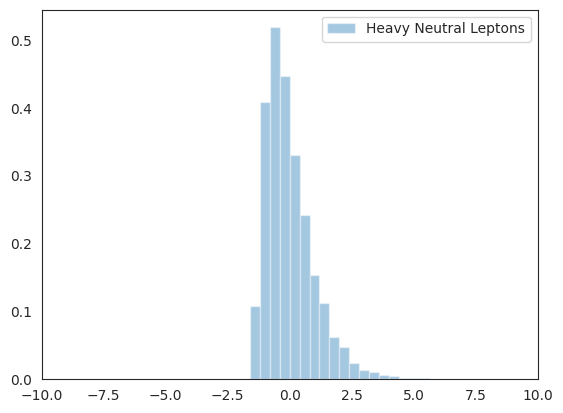

In [ ]:
#Plotting our newly standardized data, through the numpy array
x = []
for entry in X_class_train:
  x.append(entry[0])

ax = sns.distplot(x, hist_kws={"range": [-10, 10]}, norm_hist = True, kde=False, label = "Heavy Neutral Leptons")#, fit=stats.gamma);
ax.set_xlim(-10, 10)
plt.legend()

<ipython-input-70-923da19ea153>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist_kws={"range": [-10, 10]}, norm_hist = True, kde=False, label = "Heavy Neutral Leptons")#, fit=stats.gamma);


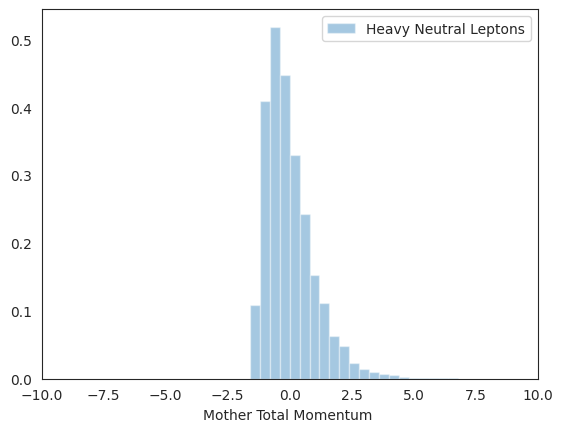

In [ ]:
x = X_train_df["Mother Total Momentum "]
ax = sns.distplot(x, hist_kws={"range": [-10, 10]}, norm_hist = True, kde=False, label = "Heavy Neutral Leptons")#, fit=stats.gamma);
ax.set_xlim(-10, 10)
plt.legend()